In [1]:
# 1. Importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import mglearn 
import seaborn as sns 
from sklearn.datasets import load_digits

In [2]:
# 2. Importing the datasets 
digits=load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [4]:
X=digits.data
y=digits.target

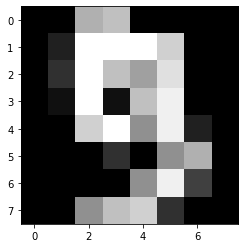

In [9]:
# Showing a image
plt.imshow(X[9].reshape(8,8),cmap='gray')

In [10]:
# Building the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)
print('X_train.Shape:',X_train.shape)
print('X_test.Shape:',X_test.shape)


X_train.Shape: (1437, 64)
X_test.Shape: (360, 64)


In [11]:
forest=RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

RandomForestClassifier()

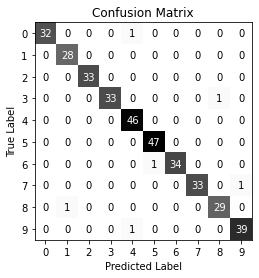

In [14]:
# Model Evaluation
from sklearn.metrics import confusion_matrix
y_pred=forest.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
scores=mglearn.tools.heatmap(cm,xlabel='Predicted Label',ylabel='True Label',xticklabels=digits.target_names,yticklabels=digits.target_names,cmap=plt.cm.gray_r,fmt='%d')
plt.title('Confusion Matrix')
plt.gca().invert_yaxis()
plt.show()

In [16]:
print('Test Score: {:.2f}'.format(forest.score(X_test,y_test)))

Test Score: 0.98


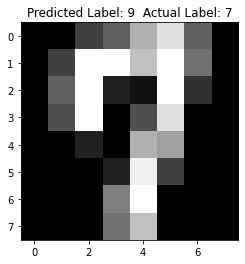

In [19]:
# Checking some where the model identified wrong
missclassified_idx=np.where(y_pred!=y_test)[0]
i=np.random.choice(missclassified_idx)
plt.imshow(X_test[i].reshape(8,8),cmap='gray')
plt.title('Predicted Label: %s  Actual Label: %s' %(y_pred[i],y_test[i]))
plt.show()